# MIDTERM
### Full name: Nguyễn Thị Minh Ngọc
### Student ID: 11219280
### Class: DSEB 63

In [1]:
import random
import numpy as np
import re

std_id = 11219280

# Question 1
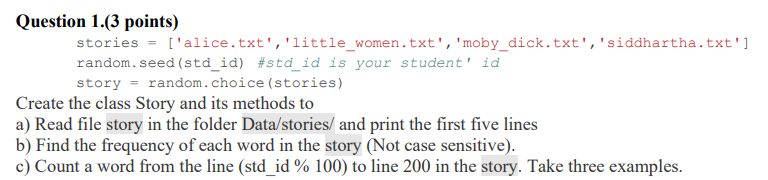

In [2]:
stories = ['alice.txt','little_women.txt','moby_dick.txt','siddhartha.txt']
random.seed(std_id)
story = random.choice(stories)
print(story)

siddhartha.txt


In [3]:
class Story:
    def __init__(self, story):
        path = f'Data/stories/{story}'
        self.story, self.lines = self.read(path)
        self.storystd, self.linestd = self.standardized()
    
    def read(self, path):
        with open(path) as file:
            story = file.read()
            story = story[3::]
        with open(path) as file:
            lines = file.readlines()
        lines[0] = lines[0][3::]
        return story, lines
            
    def standardized(self):
        # lines standardized
        self.linestd = self.lines
        for i in range(len(self.linestd)):
            self.linestd[i] = self.linestd[i].replace('\n', '')
            while '  ' in self.linestd[i]:
                self.linestd[i] = self.linestd[i].replace('  ', ' ')
            self.linestd[i] = self.linestd[i].strip()
        while '' in self.linestd:
            self.linestd.remove('')
            
        # paragraph standardized
        self.storystd = self.story
        self.storystd = self.storystd.replace('\n', ' ')
        self.storystd = re.sub('[^a-zA-Z0-9 ]', '', self.storystd)
        while '  ' in self.storystd:
            self.storystd = self.storystd.replace('  ', ' ')
        if self.storystd[-1] == ' ':
            self.storystd = self.storystd[:-2:]
        self.storystd = self.storystd.lower()
        return self.storystd, self.linestd
    
    def print_story(self, start = 1, end = -1):
        start -= 1
        if end == -1 or end>len(self.linestd)+1:
            end = len(self.linestd) + 1
        print(self.linestd[start:end])
        
    def word_freq(self, start = 1, end = -1, word_find = None):
        start -= 1
        if end == -1 or end>len(self.linestd):
            end = len(self.linestd)
        sample = ''
        for i in range(start, end):
            sample += self.linestd[i].lower()
        words = sample.split(' ')
        words_set = set(words)
        words_fre = {}
        for word in words_set:
            words_fre[word] = words.count(word)
        if word_find == None:
            print(words_fre)
        elif word_find not in words_fre:
            print(f'{word_find}: 0')
        else:
            print(f'{word_find}: {words_fre[word]}')

### 1 - a

In [4]:
str1 = Story(story)
str1.print_story(1, 5)

['The Project Gutenberg EBook of Siddhartha, by Herman Hesse', 'This eBook is for the use of anyone anywhere at no cost and with', 'almost no restrictions whatsoever. You may copy it, give it away or', 're-use it under the terms of the Project Gutenberg License included', 'with this eBook or online at www.gutenberg.org']


### 1 - b

In [5]:
str1.word_freq(1, 5)

{'by': 1, 'it': 2, 'online': 1, 'copy': 1, 'give': 1, 'for': 1, 'use': 1, 'terms': 1, 'the': 4, 'is': 1, 'www.gutenberg.org': 1, 'you': 1, 'orre-use': 1, 'ebook': 3, 'it,': 1, 'or': 1, 'anyone': 1, 'no': 2, 'and': 1, 'includedwith': 1, 'away': 1, 'anywhere': 1, 'may': 1, 'hessethis': 1, 'herman': 1, 'withalmost': 1, 'whatsoever.': 1, 'at': 2, 'under': 1, 'gutenberg': 2, 'siddhartha,': 1, 'this': 1, 'license': 1, 'project': 2, 'of': 3, 'restrictions': 1, 'cost': 1}


### 1 - c

In [6]:
str1.word_freq(std_id%100, 200, 'waiting')
str1.word_freq(std_id%100, 200, 'of')
str1.word_freq(std_id%100, 200, 'hello')

waiting: 2
of: 2
hello: 0


# Question 2
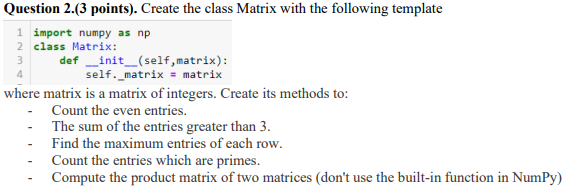

In [7]:
class Matrix:
    def __init__(self, matrix):
        self.matrix = matrix.copy()
    
    def __repr__(self):
        return str(self.matrix)
    
    def count_even_entries(self):
        return len(self.matrix[self.matrix%2 == 1])
    
    def sum_greater_than_3(self):
        return sum(self.matrix[self.matrix>3])
    
    def max_entry_per_row(self):
        max_entry = {}
        for i in range(len(self.matrix)):
            max_entry[f'row {i}'] = max(self.matrix[i])
        return max_entry
    
    def check_prime(self, number):
        if number < 2:
            return False
        else:
            divisor = 0
            for i in range(1, number+1):
                if number%i == 0:
                    divisor += 1
            if divisor == 2:
                return True
            else:
                return False
    
    def prime_entries_count(self):
        count = 0
        for row in range(len(self.matrix)):
            for col in range(len(self.matrix[0])):
                if self.check_prime(self.matrix[row][col]) == True:
                    count += 1
        return count
    
    def product(self, matrix):
        prod = np.zeros((self.matrix.shape[0], matrix.shape[1]), dtype = int)
        if self.matrix.shape[1] != matrix.shape[0]:
            return 'Invalid'
        else:
            for i in range(self.matrix.shape[0]):
                for i2 in range(matrix.shape[1]):
                    index = 0
                    for i3 in range(matrix.shape[0]):
                        index += self.matrix[i][i3] * matrix[i3][i2]
                    prod[i][i2] = index
            return prod

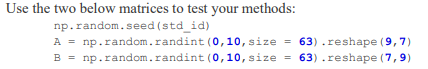

In [8]:
np.random.seed(std_id)
A = np.random.randint(0,10,size = 63).reshape(9,7)
B = np.random.randint(0,10,size = 63).reshape(7,9)
print(A)

[[0 0 8 1 6 0 5]
 [3 9 1 3 1 6 5]
 [8 6 8 3 6 5 1]
 [2 2 7 8 9 7 0]
 [1 0 8 7 4 6 2]
 [3 6 2 1 3 4 3]
 [7 0 7 5 3 5 6]
 [3 3 4 4 8 9 4]
 [8 0 3 0 2 9 3]]


In [9]:
mtA = Matrix(A)
mtB = Matrix(B)
testA = f'Matrix A:'
testB = f'Matrix B:'

In [10]:
# Count the even entries
print(testA, mtA.count_even_entries())
print(testB, mtB.count_even_entries())

Matrix A: 31
Matrix B: 33


In [11]:
# The sum of the entries greater than 3
print(testA, mtA.sum_greater_than_3())
print(testB, mtB.sum_greater_than_3())

Matrix A: 214
Matrix B: 253


In [12]:
# Find the maximum entries of each row.
print(testA, mtA.max_entry_per_row())
print(testB, mtB.max_entry_per_row())

Matrix A: {'row 0': 8, 'row 1': 9, 'row 2': 8, 'row 3': 9, 'row 4': 8, 'row 5': 6, 'row 6': 7, 'row 7': 9, 'row 8': 9}
Matrix B: {'row 0': 9, 'row 1': 9, 'row 2': 7, 'row 3': 7, 'row 4': 9, 'row 5': 9, 'row 6': 9}


In [13]:
# Count the entries which are primes
print(testA, mtA.prime_entries_count())
print(testB, mtB.prime_entries_count())

Matrix A: 26
Matrix B: 27


In [14]:
# Compute the product matrix of two matrices
print(mtA.product(B))

[[ 96 115 116  92  35  60 115 134  53]
 [ 75 179 164  95  86 152 172 130 119]
 [155 210 218 150  89 177 196 201 137]
 [143 190 177 167  81 161 197 148 115]
 [101 142 145 111  71 133 157 112  92]
 [ 78 144 127  83  59 108 133 117  89]
 [132 152 186 122 108 176 196 186 113]
 [144 214 171 144  98 171 228 172 129]
 [112 144 121  65  93 152 171 139 108]]


# Question 3
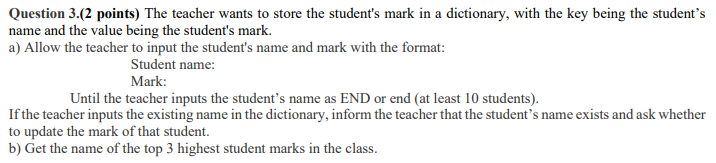

In [15]:
student_mark = {"Ngọc": 10, "Vy": 8, "Giang": 8.5, "Uyên": 9, "Thảo": 10, "Phương": 9.5, "Hiền": 8,
               "Quân": 8}

In [17]:
name = input('Student name: ')
while name.lower() != 'end':
    mark = float(input('Mark: '))
    if name in student_mark:
        ask = input('Name already exists. Do you want to update the mark? (y/n) - ')
        if ask.lower() == 'y':
            student_mark[name] = mark
    else:
        student_mark[name] = mark
    name = input('Student name: ')
    if name.lower() == 'end' and len(student_mark) < 10:
        print(f">>> Atleast 10 students. Add {10 - len(student_mark)} more.")
        name = input("Student name: ")

In [18]:
2
student_mark_copy = student_mark.copy()
top3 = {}
while len(top3) < 3:
    mark_max = max(student_mark_copy.values())
    while mark_max in student_mark_copy.values():
        for i in student_mark_copy:
            if student_mark_copy[i] == mark_max:
                top3[i] = mark_max
                student_mark_copy[i] = -1
print(top3)

{'Ngọc': 10, 'Thảo': 10, 'Phương': 9.5}


# Question 4
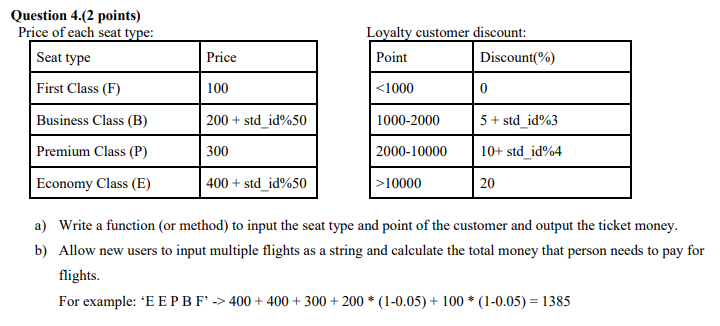

In [19]:
def ticket_price(seat, point):
    
    # discount
    if point < 1000:
        discount = 0
    elif point <= 2000:
        discount = 5 + std_id%3
    elif point <= 10000:
        discount = 10 + std_id%4
    else:
        discount = 20
    
    # seat type
    if seat == 'F':
        price = 100
    elif seat == 'B':
        price = 200 + std_id%50
    elif seat == 'P':
        price == 300
    elif seat == 'E':
        price = 400 + std_id%50
    else:
        price = 0
    
    final = price - price*discount/100
        
    return final

In [20]:
print(ticket_price('E', 2000))

408.5


In [21]:
def pay_multiple(string, point):
    ticket = string.split(' ')
    amount = 0
    for i in ticket:
        amount += ticket_price(i, point)
    return amount

In [22]:
print(pay_multiple('B F E B H HG', 2000))

940.5
